# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

### Q1. Read the data (jokes.csv)

In [2]:
df_j = pd.read_csv("C:\\Users\\srivi\\Downloads\\jokes.csv")

In [3]:
df_j

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [4]:
df_j.shape

(24983, 101)

In [5]:
df_j.columns.values

array(['NumJokes', 'Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6',
       'Joke7', 'Joke8', 'Joke9', 'Joke10', 'Joke11', 'Joke12', 'Joke13',
       'Joke14', 'Joke15', 'Joke16', 'Joke17', 'Joke18', 'Joke19',
       'Joke20', 'Joke21', 'Joke22', 'Joke23', 'Joke24', 'Joke25',
       'Joke26', 'Joke27', 'Joke28', 'Joke29', 'Joke30', 'Joke31',
       'Joke32', 'Joke33', 'Joke34', 'Joke35', 'Joke36', 'Joke37',
       'Joke38', 'Joke39', 'Joke40', 'Joke41', 'Joke42', 'Joke43',
       'Joke44', 'Joke45', 'Joke46', 'Joke47', 'Joke48', 'Joke49',
       'Joke50', 'Joke51', 'Joke52', 'Joke53', 'Joke54', 'Joke55',
       'Joke56', 'Joke57', 'Joke58', 'Joke59', 'Joke60', 'Joke61',
       'Joke62', 'Joke63', 'Joke64', 'Joke65', 'Joke66', 'Joke67',
       'Joke68', 'Joke69', 'Joke70', 'Joke71', 'Joke72', 'Joke73',
       'Joke74', 'Joke75', 'Joke76', 'Joke77', 'Joke78', 'Joke79',
       'Joke80', 'Joke81', 'Joke82', 'Joke83', 'Joke84', 'Joke85',
       'Joke86', 'Joke87', 'Joke88', 'Joke89', 'J

# Insight:

There are 24983 users and 100 jokes feature and 1 #of jokes rated by user as features.  

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [6]:
rating = df_j.iloc[0:200,1:101]
# or rating = df_j.iloc[:200,1:]

In [7]:
rating

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,99.00,99.00,99.00,99.00,7.91,99.00,3.64,-1.89,99.00,99.00,...,2.96,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [8]:
rating.shape

(200, 100)

In [9]:
rating.columns.values

array(['Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6', 'Joke7',
       'Joke8', 'Joke9', 'Joke10', 'Joke11', 'Joke12', 'Joke13', 'Joke14',
       'Joke15', 'Joke16', 'Joke17', 'Joke18', 'Joke19', 'Joke20',
       'Joke21', 'Joke22', 'Joke23', 'Joke24', 'Joke25', 'Joke26',
       'Joke27', 'Joke28', 'Joke29', 'Joke30', 'Joke31', 'Joke32',
       'Joke33', 'Joke34', 'Joke35', 'Joke36', 'Joke37', 'Joke38',
       'Joke39', 'Joke40', 'Joke41', 'Joke42', 'Joke43', 'Joke44',
       'Joke45', 'Joke46', 'Joke47', 'Joke48', 'Joke49', 'Joke50',
       'Joke51', 'Joke52', 'Joke53', 'Joke54', 'Joke55', 'Joke56',
       'Joke57', 'Joke58', 'Joke59', 'Joke60', 'Joke61', 'Joke62',
       'Joke63', 'Joke64', 'Joke65', 'Joke66', 'Joke67', 'Joke68',
       'Joke69', 'Joke70', 'Joke71', 'Joke72', 'Joke73', 'Joke74',
       'Joke75', 'Joke76', 'Joke77', 'Joke78', 'Joke79', 'Joke80',
       'Joke81', 'Joke82', 'Joke83', 'Joke84', 'Joke85', 'Joke86',
       'Joke87', 'Joke88', 'Joke89', 'Joke90', 'Jok

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [10]:
rating.isnull().sum().any()

False

In [11]:
rating.replace(99, 0, inplace=True)

In [12]:
rating.head(1)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82,0.0,0.0,0.0,0.0,0.0,-5.63,0.0,0.0,0.0


# Insight:

There are no null values

But there is a value 99 which means user has not rated so normalizing the dataset by replacing the value by 0.

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [13]:
l_mean = rating.mean()

In [14]:
l_mean

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

### Q5. List most popular 10 jokes

In [15]:
l_mean.sort_values(ascending=False)[:10]

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

# Insight:

Finding the mean for each jokes and sort in descending order to find top 10 most rated jokes

This gives the most 10 popular jokes. Popularity based recomendation.

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [16]:
books = pd.read_csv("C:\\Users\\srivi\\Downloads\\books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('C:\\Users\\srivi\\Downloads\\users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('C:\\Users\\srivi\\Downloads\\ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\srivi\anaconda3\lib\site-packages\IPython\core\interactiveshell.p

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [17]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [18]:
books.columns.values

array(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication',
       'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'], dtype=object)

In [19]:
users.columns.values

array(['userID', 'Location', 'Age'], dtype=object)

In [20]:
ratings.columns.values

array(['userID', 'ISBN', 'bookRating'], dtype=object)

In [21]:
books.drop(labels=['imageUrlS', 'imageUrlM', 'imageUrlL'], inplace=True, axis=1)

In [22]:
books.columns.values

array(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication',
       'publisher'], dtype=object)

# Insight:

There are 271360 records and 8 features in books dataset 

There are 278858 records and 3 features in users dataset 

There are 1149780 records and 3 features in ratings dataset 


In [23]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [24]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [26]:
#ratings_new = pd.merge(pd.merge(books, ratings,on='ISBN'),users,on='userID')

In [27]:
#ratings_new.head()

In [28]:
#ratings_new.shape

In [29]:
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings_new = ratings_new[ratings['userID'].isin(users['userID'])]

<ipython-input-29-89c7152b2590>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings_new = ratings_new[ratings['userID'].isin(users['userID'])]


In [30]:
ratings_new.shape

(1031136, 3)

In [31]:
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Insight:

For collaborative filtering we need only user id, item id and rating and hence we have extrated only the matching records from all three datasets combined and keeping ratings as primary dataset

Note : Merging the dataset will give all the records and 9 features hance we use different approach as shown above

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [32]:
ratings_new['bookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [33]:
ratings_new['bookRating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [34]:
ratings_new.drop(ratings_new[ratings_new['bookRating'] == 0].index, inplace = True) 

In [35]:
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

In [36]:
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

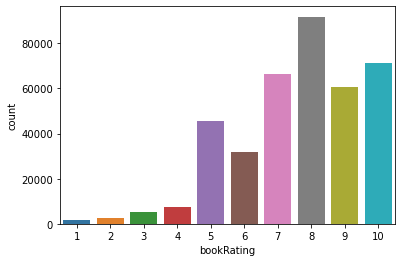

In [37]:
sns.countplot(x="bookRating", data=ratings_new)

# Insight:

Most of the rating are above 5. so most of the books are good and hence we can recommend it to other users.

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [38]:
#ratings_filtered = ratings_new_drop.groupby('userID').filter(lambda x: len(x) >=100)

counts = ratings_new['userID'].value_counts()
ratings_new_user = ratings_new[ratings_new['userID'].isin(counts[counts>=100].index)]
ratings_new_user


,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


In [39]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [40]:
data = Dataset.load_from_df(ratings_new_user[['userID', 'ISBN', 'bookRating']], reader)

In [41]:
data

In [42]:
data.df

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [43]:
trainset, testset = train_test_split(data, test_size=.25,random_state=100)


In [44]:
trainset

In [45]:
svd_model = SVD(n_factors=20, random_state=10)
svd_model.fit(trainset)

In [46]:
test_pred = svd_model.test(testset)

In [47]:
accuracy.rmse(test_pred)

RMSE: 1.4984


1.4984382187009166

# Insight:

Got RMSE of 1.4, tuning the hyperparameter like n_factor (no of features need to be created), learning rate etc we can improve accuracy

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [48]:
testset_new = trainset.build_anti_testset()

In [49]:
predictions = svd_model.test(testset_new)

In [50]:
predictions_df = pd.DataFrame(predictions)

In [51]:
predictions_df.head()

,uid,iid,r_ui,est,details
0,177432,3829060114,7.821595,8.085197,{'was_impossible': False}
1,177432,0590457225,7.821595,8.006415,{'was_impossible': False}
2,177432,0141000198,7.821595,7.272852,{'was_impossible': False}
3,177432,2203001143,7.821595,8.343216,{'was_impossible': False}
4,177432,067003021X,7.821595,7.991302,{'was_impossible': False}


In [52]:
def get_recomm(userID,n):
    recomm = predictions_df[predictions_df['uid']==userID][['uid','iid','est']].sort_values(by='est',ascending=False).head(n)  
    return recomm


In [53]:
get_recomm(95902,4)

,uid,iid,est
19615577,95902,0439136369,8.073607
19614751,95902,0441172717,8.069904
19620658,95902,0590353403,8.058548
19617435,95902,059035342X,8.028707


# Insight:

By passing the user and no of recomendation to get_recomm we can recommend the books to the user. 